# Generation of Bell states and quantum entanglement
#

In [278]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import DensityMatrix, partial_trace, entropy

# Visualization
from qiskit.visualization import array_to_latex, plot_histogram, plot_state_city

# Simulator
from qiskit_aer import Aer, AerSimulator 

# Others 
from IPython.display import Markdown
import numpy as np
%matplotlib inline

## <font color=Magenta> Create Bell state $|\phi^+\rangle$</font>

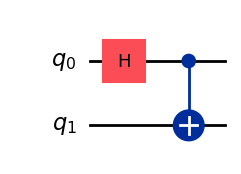

In [279]:
qc = QuantumCircuit(2)

# Apply H-gate to the first qubit:
qc.h(0)

# Apply a CNOT:
qc.cx(0,1)

# Show circuit
display(qc.draw('mpl'))

### <font color=Magenta> $\bullet$ Density matrix and von-Neumann ($S = - \rho\,\text{Tr}\ln\rho$) entanglement</font>

In [280]:
rho = DensityMatrix(qc)
display(array_to_latex(rho, prefix="\\text{Density matrix} ="))
print('Entropy =',np.round(entropy(rho)) )

rhoA = partial_trace(rho,[1])
display(array_to_latex(rhoA, prefix="\\text{Reduced density matrix} ="))
S_A = np.round(entropy(rhoA))
print('Entropy from the reduced density matrix =',np.round(entropy(rhoA)) 
)
if S_A == 1:
    print('Maximally entangled.')
else:
    print('Not maximally entangled.')

<IPython.core.display.Latex object>

Entropy = 0.0


<IPython.core.display.Latex object>

Entropy from the reduced density matrix = 1.0
Maximally entangled.


### <font color=Magenta> $\bullet$ State vector</font>

In [281]:
phi_p = Statevector(qc)
print(phi_p)
display( Markdown(r'Two qubit state ='), phi_p.draw('latex') )
array_to_latex(phi_p, prefix="(\\text{Two qubit state})^T = ")

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


Two qubit state =

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### <font color=Magenta> $\bullet$ Simulate and plot probabilties for $|\phi^+\rangle$</font>

Final state = Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


Two qubit state =

<IPython.core.display.Latex object>

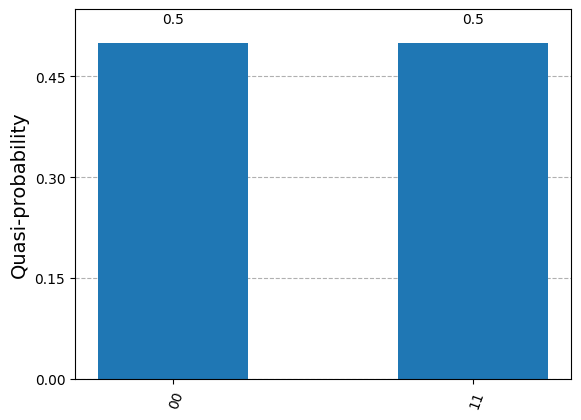

In [282]:
#simulator = AerSimulator() # need to import AerSimulator 
simulator = Aer.get_backend('qasm_simulator') # simulator is also called 'backend'
simulator = Aer.get_backend('aer_simulator')

# Save the statevector into the quantum circuit
qc.save_statevector()


# Transpile the circuit for the simulator
qc = transpile(qc, simulator)

# Run on the simulator/backend
#job = simulator.run(qobj).result() # obsolete
job = simulator.run(qc, shots=1, memory=True).result() # some define variable `result` as well 

# Get final statevector from job
final_state_1 = job.get_statevector()
print('Final state =',final_state_1)
display( Markdown(r'Two qubit state ='), final_state_1.draw('latex') )
array_to_latex(final_state_1, prefix="(\\text{Two qubit state})^T = ")

# Get counts and plot histogram 
plot_histogram(job.get_counts())

**Remark:** In the above plot, we clearly see only states $|00\rangle$ and $|11\rangle$ are contributing with equal probabilities: 50%. Other possible states are absent. 

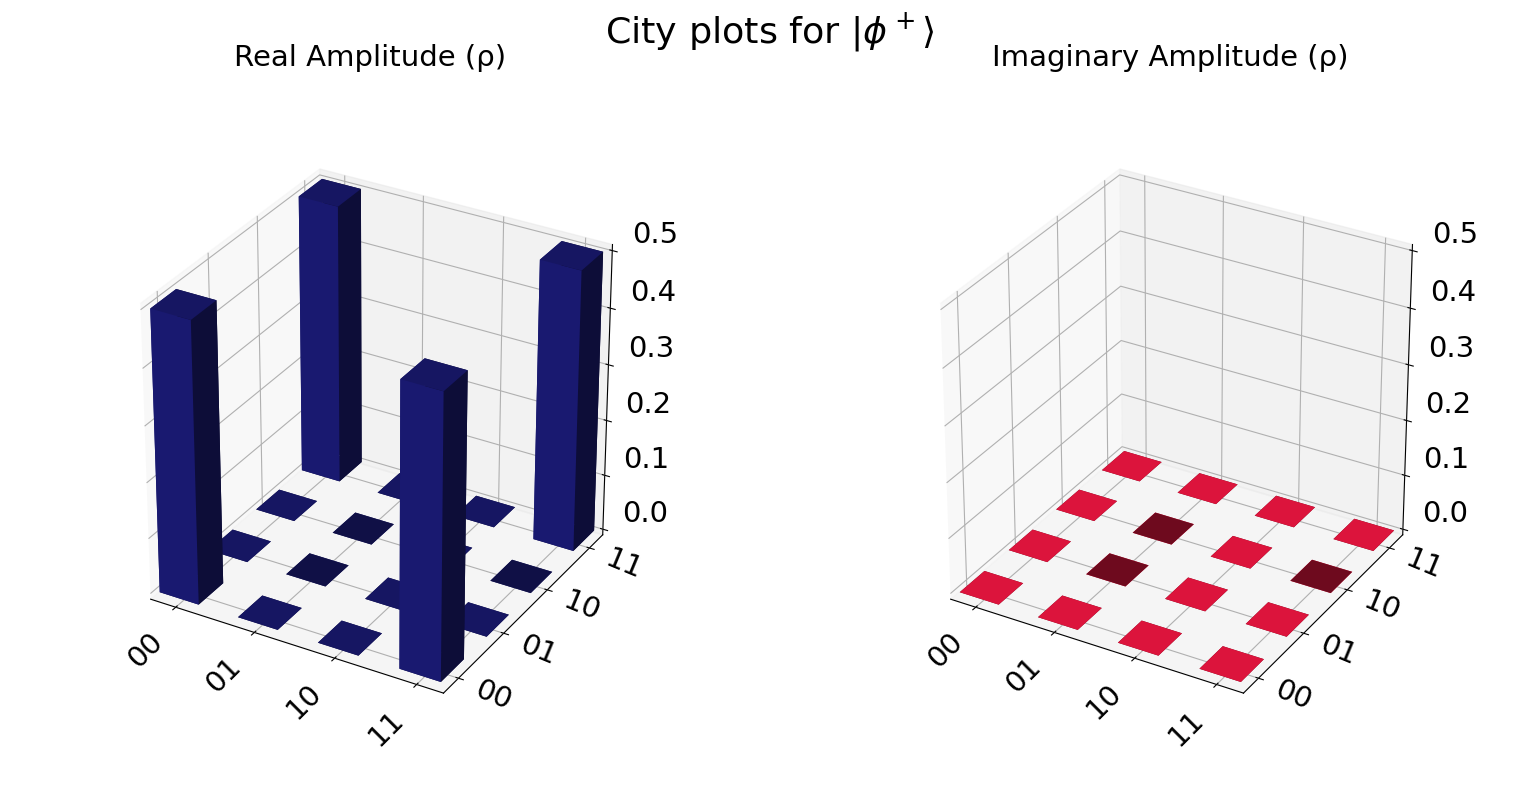

In [283]:
# City plot
plot_state_city(final_state_1, color=['midnightblue', 'crimson'], title=r'City plots for $|\phi^+\rangle$')

**Remark:** The city plot indicates the density matrix contribution: $\rho = |\phi^+\rangle\langle \phi^+| = \frac{1}{2}\big[|00\rangle\langle 00| + |11\rangle\langle 11| + |00\rangle\langle 11| + |11\rangle\langle 00|\big]$.

## <font color=Purple> Create Bell state $|\psi^+\rangle$</font>


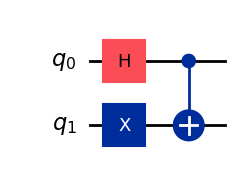

In [284]:
# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Create state |1> on q1 channel
qc.x(1)

# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

### <font color=Purple> $\bullet$ State vector</font>

In [285]:
psi_p = Statevector(qc)
print(psi_p)
display( Markdown(r'Two qubit state ='), psi_p.draw('latex') )
array_to_latex(psi_p, prefix="(\\text{Two qubit state})^T = ")

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


Two qubit state =

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### <font color=Purple> $\bullet$ Simulate and plot probabilties for $|\psi^+\rangle$</font>


Final state = Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


Two qubit state =

<IPython.core.display.Latex object>

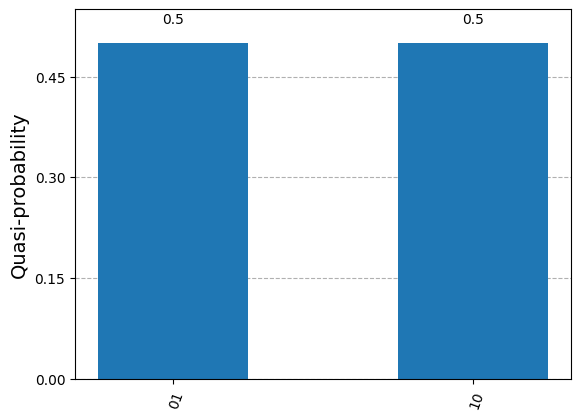

In [286]:
simulator = AerSimulator() # need to import AerSimulator 

# Save the statevector into the quantum circuit
qc.save_statevector() # 


# Transpile the circuit for the simulator
qc = transpile(qc, simulator)

# Run job on the simulator/backend 
#job = simulator.run(qobj).result() # obsolete
job = simulator.run(qc).result() 


# Get final statevector from job
final_state_2 = job.get_statevector()
print('Final state =',final_state_2)
display( Markdown(r'Two qubit state ='), final_state_2.draw('latex') )
array_to_latex(final_state_2, prefix="(\\text{Two qubit state})^T = ")



# Get counts and plot histogram
plot_histogram(job.get_counts())

**Remark:** In the above plot, we clearly only states $|01\rangle$ and $|10\rangle$ are contributing with equal probabilities: 50%. Other possible states are absent. 

### <font color=Purple> $\bullet$ Doing the same using classical registers in the circuit</font>


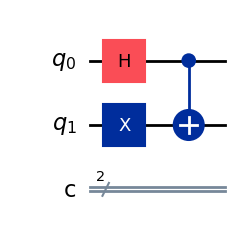

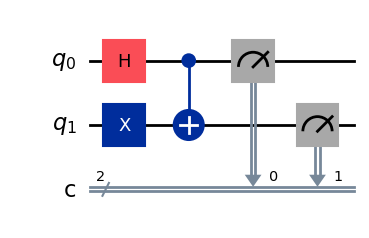

Final state = Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


Collapsed two qubit state (after last measurement) =

<IPython.core.display.Latex object>

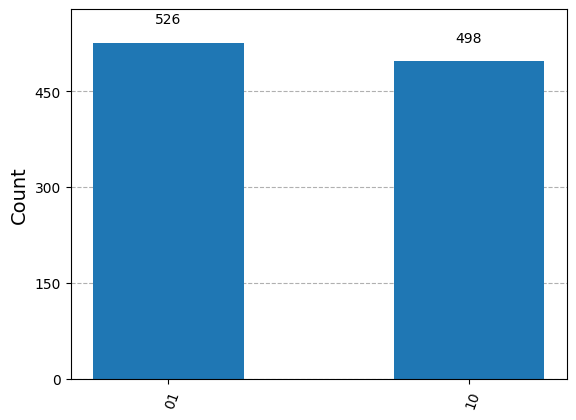

In [287]:
# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2,2) # Now we add classical registers as well (measurement channels)

# Create state |1> on q1 channel
qc.x(1)

# Apply H-gate to the first:
qc.h(0)

# Apply a CNOT:
qc.cx(0,1)

# Draw the circuit
display(qc.draw('mpl'))

# Since we added classical registers, we need to perform measurements as well
qc.measure([0, 1], [0, 1]) 
# Above is equivalent to measuring (0,0) and (1,1) [commented below]
'''
qc.measure(0,0)
qc.measure(1,1)
'''


# Draw the circuit again
display(qc.draw('mpl'))


simulator = AerSimulator() # need to import AerSimulator 

# Save the statevector into the quantum circuit
qc.save_statevector() # 


# Transpile the circuit for the simulator
qc = transpile(qc, simulator)

# Run job on the simulator/backend 
#job = simulator.run(qobj).result() # obsolete
job = simulator.run(qc).result() 


# Get final statevector from job
final_state_2 = job.get_statevector()
print('Final state =',final_state_2)
display( Markdown(r'Collapsed two qubit state (after last measurement) ='), final_state_2.draw('latex') )
array_to_latex(final_state_2, prefix="(\\text{Two qubit state})^T = ")



# Get counts and plot histogram
plot_histogram(job.get_counts())

## <font color=DeepRed>Exercise:</font>
### **Create $|\phi^-\rangle$ and $|\psi^-\rangle$.**

#### Hint:  state $|1\rangle$ gives minus sign after operating with H-gate. 